In [1]:
import pandas as pd
import numpy as np
import os

# seaborn可视化
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="notebook", style="darkgrid", 
        palette="deep", font="sans-serif", 
        font_scale=1, color_codes=True)

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

## 制作自己的2016年的合并表项

In [7]:
folder_path = "2016-citibike-tripdata"
dataframes = []

for month_folder in os.listdir(folder_path):
    month_folder_path = os.path.join(folder_path, month_folder)
    if os.path.isdir(month_folder_path):
        # 遍历月份文件夹中的每个CSV文件
        for file_name in os.listdir(month_folder_path):
            file_path = os.path.join(month_folder_path, file_name)
            if file_path.endswith('.csv'):
                print(f"Processing file: {file_path}")
                # 读取CSV文件
                df = pd.read_csv(file_path)
                dataframes.append(df)

Processing file: 2016-citibike-tripdata\10_October\201610-citibike-tripdata_1.csv
Processing file: 2016-citibike-tripdata\10_October\201610-citibike-tripdata_2.csv
Processing file: 2016-citibike-tripdata\11_November\201611-citibike-tripdata_1.csv
Processing file: 2016-citibike-tripdata\11_November\201611-citibike-tripdata_2.csv
Processing file: 2016-citibike-tripdata\12_December\201612-citibike-tripdata_1.csv
Processing file: 2016-citibike-tripdata\1_January\201601-citibike-tripdata_1.csv
Processing file: 2016-citibike-tripdata\2_February\201602-citibike-tripdata_1.csv
Processing file: 2016-citibike-tripdata\3_March\201603-citibike-tripdata_1.csv
Processing file: 2016-citibike-tripdata\4_April\201604-citibike-tripdata_1.csv
Processing file: 2016-citibike-tripdata\4_April\201604-citibike-tripdata_2.csv
Processing file: 2016-citibike-tripdata\5_May\201605-citibike-tripdata_1.csv
Processing file: 2016-citibike-tripdata\5_May\201605-citibike-tripdata_2.csv
Processing file: 2016-citibike-tr

In [ ]:
# 合并所有DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# 你可以选择保存这个合并后的DataFrame到一个新的CSV文件中
combined_df.to_csv('combined_nyc_bike_share_2016.csv', index=False)

# Read the Data


In [2]:
data = pd.read_csv('combined_nyc_bike_share_2016.csv')
data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,328.0,2016-10-01 00:00:07,2016-10-01 00:05:35,471.0,Grand St & Havemeyer St,40.712868,-73.956981,3077.0,Stagg St & Union Ave,40.708771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,398.0,2016-10-01 00:00:11,2016-10-01 00:06:49,3147.0,E 85 St & 3 Ave,40.778012,-73.954071,3140.0,1 Ave & E 78 St,40.771404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,430.0,2016-10-01 00:00:14,2016-10-01 00:07:25,345.0,W 13 St & 6 Ave,40.736494,-73.997044,470.0,W 20 St & 8 Ave,40.743453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,351.0,2016-10-01 00:00:21,2016-10-01 00:06:12,3307.0,West End Ave & W 94 St,40.794165,-73.974124,3357.0,W 106 St & Amsterdam Ave,40.800836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2693.0,2016-10-01 00:00:21,2016-10-01 00:45:15,3428.0,8 Ave & W 16 St,40.740983,-74.001702,3323.0,W 106 St & Central Park West,40.798186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


处理null值，因为数据不一致

In [3]:
data_to_process = data.copy()

In [4]:
data_to_process.columns = [col.lower() for col in data.columns]
data_to_process.columns = [col.replace(" ", "") for col in data_to_process.columns]
data_to_process.head()


,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,...,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,usertype,birthyear,gender
0,328.0,2016-10-01 00:00:07,2016-10-01 00:05:35,471.0,Grand St & Havemeyer St,40.712868,-73.956981,3077.0,Stagg St & Union Ave,40.708771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,398.0,2016-10-01 00:00:11,2016-10-01 00:06:49,3147.0,E 85 St & 3 Ave,40.778012,-73.954071,3140.0,1 Ave & E 78 St,40.771404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,430.0,2016-10-01 00:00:14,2016-10-01 00:07:25,345.0,W 13 St & 6 Ave,40.736494,-73.997044,470.0,W 20 St & 8 Ave,40.743453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,351.0,2016-10-01 00:00:21,2016-10-01 00:06:12,3307.0,West End Ave & W 94 St,40.794165,-73.974124,3357.0,W 106 St & Amsterdam Ave,40.800836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2693.0,2016-10-01 00:00:21,2016-10-01 00:45:15,3428.0,8 Ave & W 16 St,40.740983,-74.001702,3323.0,W 106 St & Central Park West,40.798186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape[0]

13845655

In [6]:
data_to_process = data_to_process.sample(frac=1, random_state=42)
data_to_process.head()

,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,...,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,usertype,birthyear,gender
1405193,168.0,2016-10-28 08:38:17,2016-10-28 08:41:05,3177.0,W 84 St & Broadway,40.786795,-73.977112,3167.0,Amsterdam Ave & W 73 St,40.779668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8820911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.754557,-73.96593,3233.0,E 48 St & 5 Ave,40.757246,-73.978059,14626.0,Subscriber,1973.0,1.0
2447168,82.0,2016-11-19 09:17:58,2016-11-19 09:19:21,2021.0,W 45 St & 8 Ave,40.759291,-73.988597,479.0,9 Ave & W 45 St,40.760193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3040504,353.0,2016-12-08 14:06:35,2016-12-08 14:12:28,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,268.0,Howard St & Centre St,40.719105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633857,530.0,2016-10-13 08:55:46,2016-10-13 09:04:36,494.0,W 26 St & 8 Ave,40.747348,-73.997236,253.0,W 13 St & 5 Ave,40.735439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


现在我们需要处理data中的重复信息，因为Colum是不一致的

## 创建一个空的dataFrame来准备接受我们现在的data

修改data_to_process, 让其匹配我们需要处理的信息

In [ ]:
processed_data = pd.DataFrame()

# 遍历所有列，按唯一列名进行合并
for col in data_to_process.columns.unique():
    # 找到所有重复的列
    duplicate_columns = data_to_process.loc[:, data_to_process.columns == col]
    
    # 合并这些列，将非空值优先保留
    if duplicate_columns.shape[1] > 1:
        # 初始化合并列为第一个重复列的数据
        combined_column = duplicate_columns.iloc[:, 0]
        # 逐列用非空值填充
        for i in range(1, duplicate_columns.shape[1]):
            combined_column = combined_column.combine_first(duplicate_columns.iloc[:, i])
        # 将合并后的列添加到新的 DataFrame 中
        processed_data[col] = combined_column
    else:
        # 如果没有重复，直接添加到新的 DataFrame 中
        processed_data[col] = duplicate_columns.iloc[:, 0]

# 显示处理后的数据
processed_data.head()

         tripduration            starttime             stoptime  \
1405193         168.0  2016-10-28 08:38:17  2016-10-28 08:41:05   
8820911         405.0   6/22/2016 11:06:33   6/22/2016 11:13:18   
2447168          82.0  2016-11-19 09:17:58  2016-11-19 09:19:21   
3040504         353.0  2016-12-08 14:06:35  2016-12-08 14:12:28   
633857          530.0  2016-10-13 08:55:46  2016-10-13 09:04:36   

         startstationid         startstationname  startstationlatitude  \
1405193          3177.0       W 84 St & Broadway             40.786795   
8820911           454.0          E 51 St & 1 Ave             40.754557   
2447168          2021.0          W 45 St & 8 Ave             40.759291   
3040504          3260.0  Mercer St & Bleecker St             40.727064   
633857            494.0          W 26 St & 8 Ave             40.747348   

         startstationlongitude  endstationid           endstationname  \
1405193             -73.977112        3167.0  Amsterdam Ave & W 73 St   
882091

In [17]:
processed_data.head()

,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,usertype,birthyear,gender
1405193,168.0,2016-10-28 08:38:17,2016-10-28 08:41:05,3177.0,W 84 St & Broadway,40.786795,-73.977112,3167.0,Amsterdam Ave & W 73 St,40.779668,-73.980930,23246.0,Subscriber,1982.0,1.0
8820911,405.0,6/22/2016 11:06:33,6/22/2016 11:13:18,454.0,E 51 St & 1 Ave,40.754557,-73.965930,3233.0,E 48 St & 5 Ave,40.757246,-73.978059,14626.0,Subscriber,1973.0,1.0
2447168,82.0,2016-11-19 09:17:58,2016-11-19 09:19:21,2021.0,W 45 St & 8 Ave,40.759291,-73.988597,479.0,9 Ave & W 45 St,40.760193,-73.991255,20018.0,Subscriber,1953.0,1.0
3040504,353.0,2016-12-08 14:06:35,2016-12-08 14:12:28,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,268.0,Howard St & Centre St,40.719105,-73.999733,18411.0,Subscriber,1988.0,1.0
633857,530.0,2016-10-13 08:55:46,2016-10-13 09:04:36,494.0,W 26 St & 8 Ave,40.747348,-73.997236,253.0,W 13 St & 5 Ave,40.735439,-73.994539,16201.0,Subscriber,1986.0,1.0


In [18]:
# 查看每个数据行有多少空值
processed_data.isnull().sum()

tripduration                   0
starttime                      0
stoptime                       0
startstationid                 0
startstationname               0
startstationlatitude           0
startstationlongitude          0
endstationid                   0
endstationname                 0
endstationlatitude             0
endstationlongitude            0
bikeid                         0
usertype                   35871
birthyear                1586863
gender                         0
dtype: int64

In [19]:
##查看一共有多少行数据
processed_data.shape[0]

13845655

## clean datas

In [11]:
processed_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13845655 entries, 0 to 13845654
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tripduration           float64
 1   starttime              object 
 2   stoptime               object 
 3   startstationid         float64
 4   startstationname       object 
 5   startstationlatitude   float64
 6   startstationlongitude  float64
 7   endstationid           float64
 8   endstationname         object 
 9   endstationlatitude     float64
 10  endstationlongitude    float64
 11  bikeid                 float64
 12  usertype               object 
 13  birthyear              float64
 14  gender                 float64
dtypes: float64(10), object(5)
memory usage: 5.8 GB


In [20]:
# Check again the shape of our data
processed_data = processed_data.sample(frac=1, random_state=42)
processed_data.head(10)

,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,usertype,birthyear,gender
11435727,325.0,8/17/2016 09:47:41,8/17/2016 09:53:06,441.0,E 52 St & 2 Ave,40.756014,-73.967416,3142.0,1 Ave & E 62 St,40.761227,-73.960940,22164.0,Subscriber,1944.0,2.0
7943689,746.0,6/3/2016 21:01:32,6/3/2016 21:13:59,393.0,E 5 St & Avenue C,40.722992,-73.979955,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14922.0,Subscriber,1987.0,2.0
9710226,749.0,7/11/2016 18:15:39,7/11/2016 18:28:08,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,418.0,Front St & Gold St,40.702240,-73.982578,21479.0,Subscriber,1970.0,2.0
10669361,1169.0,8/1/2016 17:31:41,8/1/2016 17:51:11,526.0,E 33 St & 5 Ave,40.747659,-73.984907,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,20173.0,Customer,NaN,0.0
5132952,1312.0,3/27/2016 15:47:12,3/27/2016 16:09:05,457.0,Broadway & W 58 St,40.766953,-73.981693,444.0,Broadway & W 24 St,40.742354,-73.989151,19706.0,Customer,NaN,0.0
1518615,2209.0,2016-10-30 16:59:43,2016-10-30 17:36:32,427.0,Bus Slip & State St,40.701907,-74.013942,301.0,E 2 St & Avenue B,40.722174,-73.983688,18264.0,Customer,NaN,0.0
7754272,139.0,5/31/2016 08:05:46,5/31/2016 08:08:06,315.0,South St & Gouverneur Ln,40.703554,-74.006702,259.0,South St & Whitehall St,40.701221,-74.012342,17057.0,Subscriber,1974.0,1.0
8597533,532.0,6/17/2016 19:56:12,6/17/2016 20:05:05,3117.0,Franklin St & Dupont St,40.735640,-73.958660,3092.0,Berry St & N 8 St,40.719009,-73.958525,23843.0,Subscriber,1985.0,1.0
7570119,1142.0,5/26/2016 14:20:21,5/26/2016 14:39:23,355.0,Bayard St & Baxter St,40.716021,-73.999744,279.0,Peck Slip & Front St,40.707873,-74.001670,20187.0,Customer,NaN,0.0
6144398,1379.0,4/19/2016 21:25:34,4/19/2016 21:48:34,150.0,E 2 St & Avenue C,40.720874,-73.980858,459.0,W 20 St & 11 Ave,40.746745,-74.007756,14978.0,Subscriber,1981.0,1.0


In [23]:
from tqdm import tqdm
tqdm.pandas()

In [21]:
# So our starting time end stop time should not be object type, but datetime type. Let's convert them.
# 挑战2：这里的数据并不是完美的，很多时间是混乱的。有年月日，也有日月年
def parse_date(date_str):
    # 检查年份在前的情况，即年月日
    if len(date_str.split('-')[0]) == 4:
        try:
            return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S', errors='coerce')
        except ValueError:
            return pd.NaT
    else:
        # 月日年的情况
        try:
            return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M:%S', errors='coerce')
        except ValueError:
            return pd.NaT


In [24]:

# 假设你的 DataFrame 是 df，并且有 'starttime' 和 'stoptime' 列
processed_data['starttime'] = processed_data['starttime'].progress_apply(parse_date)
processed_data['stoptime'] = processed_data['stoptime'].progress_apply(parse_date)

# 打印转换后的数据以验证
processed_data[['starttime', 'stoptime']].head()

100%|██████████| 13845655/13845655 [19:02<00:00, 12118.76it/s]


,starttime,stoptime
11435727,2016-08-17 09:47:41,2016-08-17 09:53:06
7943689,2016-06-03 21:01:32,2016-06-03 21:13:59
9710226,2016-07-11 18:15:39,2016-07-11 18:28:08
10669361,2016-08-01 17:31:41,2016-08-01 17:51:11
5132952,2016-03-27 15:47:12,2016-03-27 16:09:05


In [25]:
processed_data.info(memory_usage='deep')
#继：挑战2： 我怎么知道我的年月日对不对啊？

<class 'pandas.core.frame.DataFrame'>
Index: 13845655 entries, 11435727 to 8075040
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tripduration           float64       
 1   starttime              datetime64[ns]
 2   stoptime               datetime64[ns]
 3   startstationid         float64       
 4   startstationname       object        
 5   startstationlatitude   float64       
 6   startstationlongitude  float64       
 7   endstationid           float64       
 8   endstationname         object        
 9   endstationlatitude     float64       
 10  endstationlongitude    float64       
 11  bikeid                 float64       
 12  usertype               object        
 13  birthyear              float64       
 14  gender                 float64       
dtypes: datetime64[ns](2), float64(10), object(3)
memory usage: 4.2 GB


In [26]:
processed_data.isnull().sum()

tripduration                   0
starttime                      0
stoptime                       0
startstationid                 0
startstationname               0
startstationlatitude           0
startstationlongitude          0
endstationid                   0
endstationname                 0
endstationlatitude             0
endstationlongitude            0
bikeid                         0
usertype                   35871
birthyear                1586863
gender                         0
dtype: int64

## 终于完成了！

In [29]:
# 现在，我们将starting time的年份、月份和日期分别提取出来，然后分别存储到新的列中。
# 同样的方法处理 stoptime

# 提取starting time的月份和日期和时分秒
processed_data['start_month'] = processed_data['starttime'].dt.month
processed_data['start_day'] = processed_data['starttime'].dt.day
processed_data['start_hour'] = processed_data['starttime'].dt.hour
processed_data['start_minute'] = processed_data['starttime'].dt.minute
processed_data['start_second'] = processed_data['starttime'].dt.second

# 提取stoptime的月份和日期和时分秒
processed_data['stop_month'] = processed_data['stoptime'].dt.month
processed_data['stop_day'] = processed_data['stoptime'].dt.day
processed_data['stop_hour'] = processed_data['stoptime'].dt.hour
processed_data['stop_minute'] = processed_data['stoptime'].dt.minute
processed_data['stop_second'] = processed_data['stoptime'].dt.second

# 查看处理后的数据
processed_data.head()

,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,...,start_month,start_day,start_hour,start_minute,start_second,stop_month,stop_day,stop_hour,stop_minute,stop_second
11435727,325.0,2016-08-17 09:47:41,2016-08-17 09:53:06,441.0,E 52 St & 2 Ave,40.756014,-73.967416,3142.0,1 Ave & E 62 St,40.761227,...,8,17,9,47,41,8,17,9,53,6
7943689,746.0,2016-06-03 21:01:32,2016-06-03 21:13:59,393.0,E 5 St & Avenue C,40.722992,-73.979955,545.0,E 23 St & 1 Ave,40.736502,...,6,3,21,1,32,6,3,21,13,59
9710226,749.0,2016-07-11 18:15:39,2016-07-11 18:28:08,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,418.0,Front St & Gold St,40.702240,...,7,11,18,15,39,7,11,18,28,8
10669361,1169.0,2016-08-01 17:31:41,2016-08-01 17:51:11,526.0,E 33 St & 5 Ave,40.747659,-73.984907,2006.0,Central Park S & 6 Ave,40.765909,...,8,1,17,31,41,8,1,17,51,11
5132952,1312.0,2016-03-27 15:47:12,2016-03-27 16:09:05,457.0,Broadway & W 58 St,40.766953,-73.981693,444.0,Broadway & W 24 St,40.742354,...,3,27,15,47,12,3,27,16,9,5


In [31]:
# 数据并保存到CSV文件
processed_data.to_csv('processed_data.csv', index=False)

In [33]:
processed_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'startstationid',
       'startstationname', 'startstationlatitude', 'startstationlongitude',
       'endstationid', 'endstationname', 'endstationlatitude',
       'endstationlongitude', 'bikeid', 'usertype', 'birthyear', 'gender',
       'start_month', 'start_day', 'start_hour', 'start_minute',
       'start_second', 'stop_month', 'stop_day', 'stop_hour', 'stop_minute',
       'stop_second'],
      dtype='object')

In [34]:
data.shape

(13845655, 30)

## Deal With Non info in our data：

In [36]:
processed_data.isnull().sum()

tripduration                   0
starttime                      0
stoptime                       0
startstationid                 0
startstationname               0
startstationlatitude           0
startstationlongitude          0
endstationid                   0
endstationname                 0
endstationlatitude             0
endstationlongitude            0
bikeid                         0
usertype                   35871
birthyear                1586863
gender                         0
start_month                    0
start_day                      0
start_hour                     0
start_minute                   0
start_second                   0
stop_month                     0
stop_day                       0
stop_hour                      0
stop_minute                    0
stop_second                    0
dtype: int64

### Creat a cleaned data set to store our clean data:

In [37]:
# creat a cleanned data set to store the not non data
cleaned_data = processed_data.dropna()

In [38]:
cleaned_data.isnull().sum()

tripduration             0
starttime                0
stoptime                 0
startstationid           0
startstationname         0
startstationlatitude     0
startstationlongitude    0
endstationid             0
endstationname           0
endstationlatitude       0
endstationlongitude      0
bikeid                   0
usertype                 0
birthyear                0
gender                   0
start_month              0
start_day                0
start_hour               0
start_minute             0
start_second             0
stop_month               0
stop_day                 0
stop_hour                0
stop_minute              0
stop_second              0
dtype: int64

In [40]:
cleaned_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 12222976 entries, 11435727 to 8075040
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tripduration           float64       
 1   starttime              datetime64[ns]
 2   stoptime               datetime64[ns]
 3   startstationid         float64       
 4   startstationname       object        
 5   startstationlatitude   float64       
 6   startstationlongitude  float64       
 7   endstationid           float64       
 8   endstationname         object        
 9   endstationlatitude     float64       
 10  endstationlongitude    float64       
 11  bikeid                 float64       
 12  usertype               object        
 13  birthyear              float64       
 14  gender                 float64       
 15  start_month            int32         
 16  start_day              int32         
 17  start_hour             int32         
 18  start_minute       

In [42]:
# 查看usertype里面存放了什么
cleaned_data['usertype'].value_counts()

usertype
Subscriber    12188588
Customer         34388
Name: count, dtype: int64

In [43]:
# 将usertype转换为类别数据类型 Subscriber=1, Customer=0
cleaned_data['usertype'] = cleaned_data['usertype'].map({'Subscriber': 1, 'Customer': 0})

# Add Weather feature to our data

## read the weather cvs

In [48]:
weather_data = pd.read_csv("New_York_City_USA.csv")
weather_data.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York City,USA",2016-01-01T00:00:00,5.8,3.5,-2.7,54.08,0.0,0,NaN,0.0,...,1018.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
1,"New York City,USA",2016-01-01T01:00:00,5.8,3.0,-3.1,53.01,0.0,0,NaN,0.0,...,1018.0,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
2,"New York City,USA",2016-01-01T02:00:00,5.4,2.7,-3.0,54.71,0.0,0,NaN,0.0,...,1017.9,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
3,"New York City,USA",2016-01-01T03:00:00,5.1,2.4,-2.9,56.04,0.0,0,NaN,0.0,...,1017.8,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
4,"New York City,USA",2016-01-01T04:00:00,5.1,1.7,-3.0,55.70,0.0,0,NaN,0.0,...,1017.8,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."


In [49]:
weather_data.shape

(8784, 24)

### darw the data corr matrix

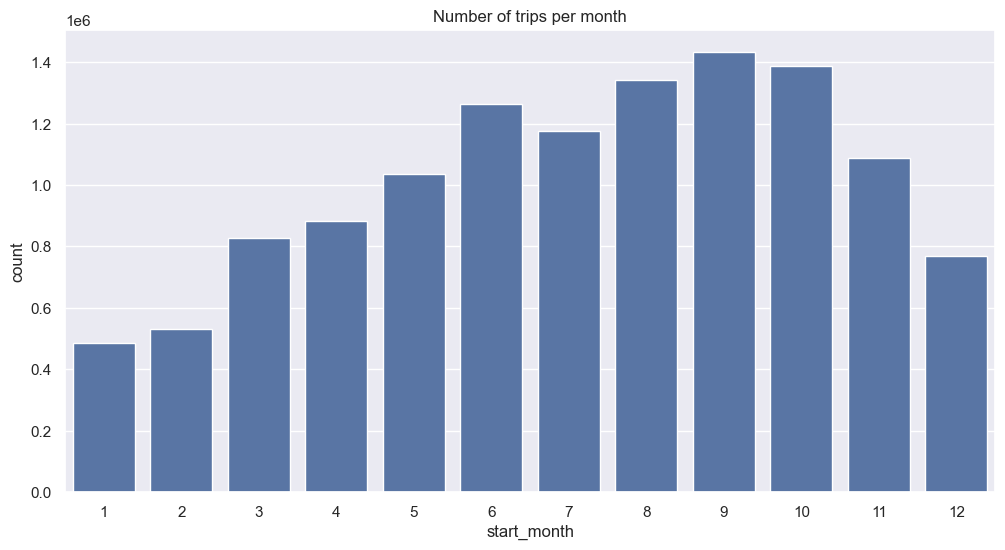

In [ ]:
# 用plt来查看start_month和出行次数的关系
plt.figure(figsize=(12, 6))
sns.countplot(x='start_month', data=cleaned_data)
plt.title('Number of trips per month')
plt.show()

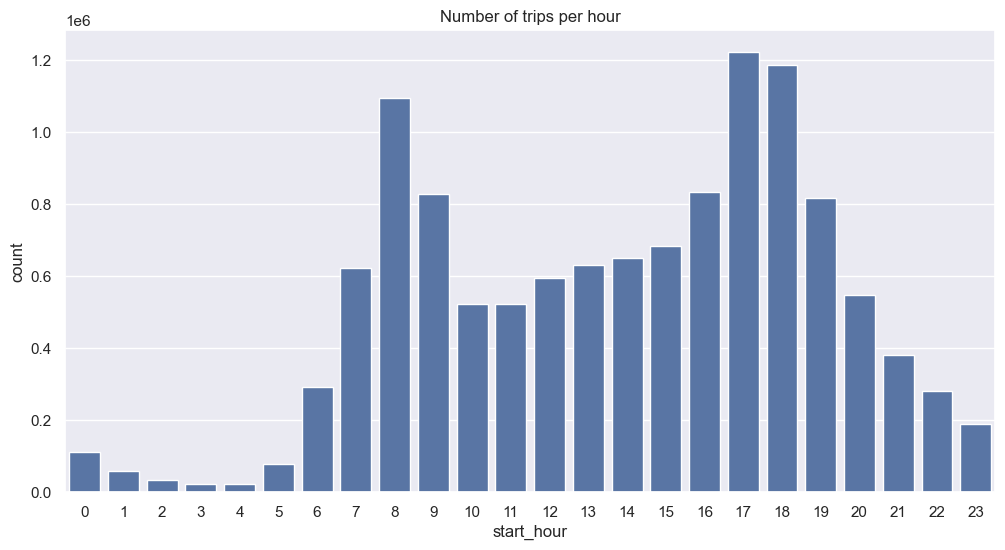

In [54]:
# 查看每天24小时与出行次数的关系
plt.figure(figsize=(12, 6))
sns.countplot(x='start_hour', data=cleaned_data)
plt.title('Number of trips per hour')
plt.show()


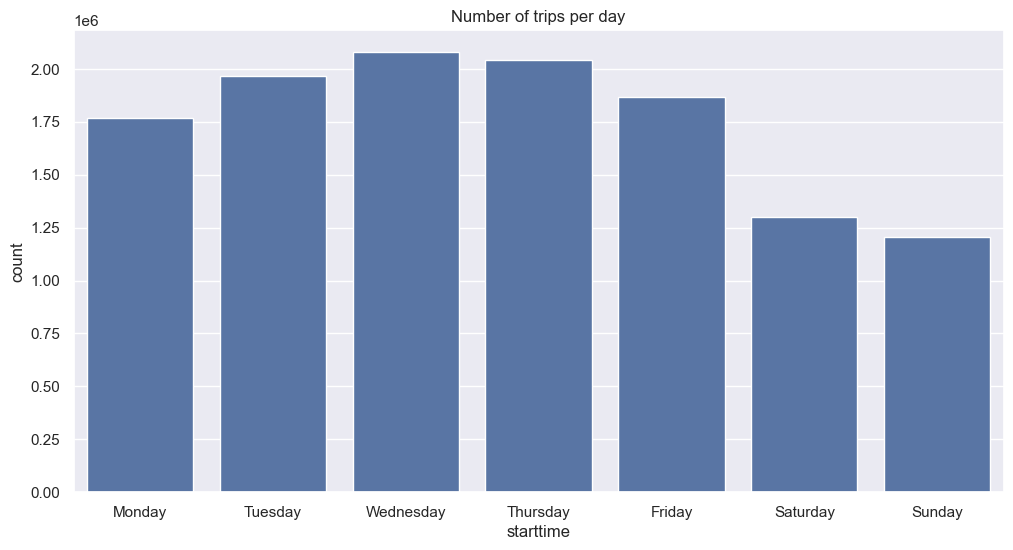

: 

In [ ]:
# 查看星期几与出行次数的关系

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.countplot(x=cleaned_data['starttime'].dt.day_name(), order=days_of_week)
plt.title('Number of trips per day')
plt.show()